In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from env import host, user, password
np.random.seed(123)
#def get_db_url(db, user=user, host=host, password=password):
    #return f'mysql+pymysql://{user}:{password}@{host}/{db}'


def get_db_url(url):
    url = f'mysql+pymysql://{user}:{password}@{host}/{url}'
    return url

chip = pd.read_sql('SELECT item_price, order_id  FROM orders', get_db_url("chipotle"))

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

What is the probability that no cars drive up in the noon hour?
What is the probability that 3 or more cars come through the drive through?
How likely is it that the drive through gets at least 1 car?

In [29]:
stats.poisson(2).pmf(x)


array([1.35335283e-01, 2.70670566e-01, 2.70670566e-01, 1.80447044e-01,
       9.02235222e-02, 3.60894089e-02, 1.20298030e-02, 3.43708656e-03,
       8.59271640e-04, 1.90949253e-04, 3.81898506e-05, 6.94360921e-06,
       1.15726820e-06, 1.78041262e-07, 2.54344660e-08])

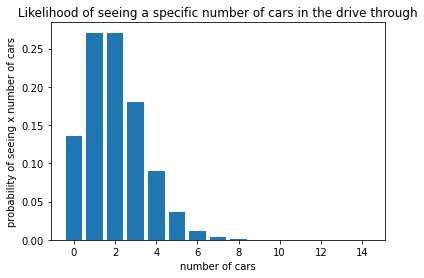

In [28]:
# make a chart, generate random numbers
x = range(0,15)
y = stats.poisson(2).pmf(x)
y
plt.bar(x,y)
plt.title("Likelihood of seeing a specific number of cars in the drive through")
# add labels for x and y x is cars, y is prob of seeing that number of cars
plt.xlabel("number of cars")
plt.ylabel("probability of seeing x number of cars")
plt.show()

In [18]:
#B What is the probability that 3 or more cars come through the drive through?
# example poisson stats.poisson(5).pmf(3)
stats.poisson(2)
# probability that there are 3 cars
#have value need prob so .sf
# .sf would give me only more than 3 so subtract one to include 3
stats.poisson(2).sf(2)

0.32332358381693654

In [38]:
# simulation
n = 10_000
x = die.distribution.rvs(n)


plt.hist(x, bins=range(0, 9), align='left', width=1, edgecolor='black')
plt.title(f'Outcome of {n:,} Dice Rolls')

NameError: name 'die' is not defined

In [19]:
#C How likely is it that the drive through gets at least 1 car?
# at least means 1 or more so value greater than
# have value means use .sf 
# minus 1 to include 1
stats.poisson(2).sf(0)

0.8646647167633873

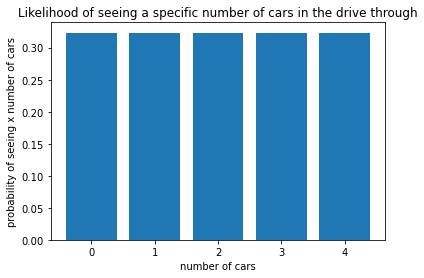

In [37]:
# simulation
x = range(0,5)
stats.poisson(2).sf(0)
y
plt.bar(x,y)
plt.title("Likelihood of seeing a specific number of cars in the drive through")
# add labels for x and y x is cars, y is prob of seeing that number of cars
plt.xlabel("number of cars")
plt.ylabel("probability of seeing x number of cars")
plt.show()

2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

What grade point average is required to be in the top 5% of the graduating class?
What GPA constitutes the bottom 15% of the class?
An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
If I have a GPA of 3.5, what percentile am I in?

In [32]:
#A What grade point average is required to be in the top 5% of the graduating class?
# Use .ppf because we want to find the value and have the prob
top_5 = stats.norm(3,.3)
top_5_cutoff = top_5.isf(.05)
top_5_cutoff

3.4934560880854417

In [34]:
# What GPA constitutes the bottom 15% of the class?
# less than or equal to a given point and we have the prob means use .ppf
bottom_15 = stats.norm.ppf(.15, 3, .3)
bottom_15

2.689069983151863

In [ ]:
# Third decile from the bottom, what is the range of the third decile, does GPA of 2.8 gpa qualify
# we don't have the number of students in the class so how could i use the formula below?


In [38]:
# range 20-30% for bottom decile
x=([.2,.3])
stats.norm(3,.3).ppf(x)
# Yes 2.8 would qualify

array([2.74751363, 2.84267985])

In [43]:
# If I have a GPA of 3.5, what percentile am I in?
stats.norm(3,.3).pdf(3.5)

0.3315904626424956

In [46]:
stats.norm(3,.3).cdf(3.5)

0.9522096477271853

In [45]:
stats.norm(3,.3).sf(3.5)

0.0477903522728147

In [49]:
3 # A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 
# click-throughs. How likely is it that this many people or more click through?
# use .isf because you need to find value greater than
stats.binom(4326, .02).sf(96)

0.1397582363130086

In [30]:
# 4 You are working on some statistics homework consisting of 100 questions where all of the answers are a 
# probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the 
# answer to each question.

#What is the probability that at least one of your first 60 answers is correct?
# use 0 because not inclusive and need one answer
stats.binom(60,.01).sf(0)

0.4528433576092388

In [58]:
# 5 The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% 
# chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 
# active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day?
# binom because 
# Use .sf because its the probability this happens at least once each day
stats.binom(59.4,.03).sf(0)
# How likely is it that it goes two days without getting cleaned up? All week?

0.8342199288437355

In [56]:
.9*22*3

59.400000000000006

In [69]:
# How likely is it that it goes two days without getting cleaned up? All week?
# .03 change it will .97 chance it wont
# n is the number of trials
stats.binom(59.4 * 2,.03).pmf(0)

0.026821436301629097

In [70]:
# All week? 5 days without getting clean

stats.binom(59.4* 5, .03).pmf(0)

0.00011781621791055166

In [5]:
# 6 You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After 
# several weeks of careful observation, you notice that the average number of people in line when your lunch break 
# starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each 
# person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at 
# least 15 minutes left to eat your food before you have to go back 
n = (15* 2) # 2 minutes each person
# * 10 b/c 1
# 35 b/c 45 minutes leaves 15 minutes to eat
stats.norm(n,3 * 2).cdf(33)


0.6914624612740131

In [31]:
# 7 Connect to the employees database and find the average salary of current employees, along with the standard 
# deviation. For the following questions, calculate the answer based on modeling the employees salaries with a 
# normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual 
# values present in the salaries dataset.
# average salary
salary = pd.read_sql('SELECT * FROM salaries WHERE to_date > NOW();', get_db_url("employees"))
salary['salary'].mean()
# A What percent of employees earn less than 60,000?



72012.23585730705

In [33]:
stdev = salary['stdev']
salary["stdev"]=['salary'].stdev()

AttributeError: 'list' object has no attribute 'stdev'

In [34]:
salary.describe()

,emp_no,salary
count,240124.000000,240124.000000
mean,253080.615365,72012.235857
std,161853.087323,17309.995380
min,10001.000000,38623.000000
25%,84878.750000,59048.750000
50%,249792.500000,69805.000000
75%,424895.250000,82546.000000
max,499999.000000,158220.000000
